## Reference

[hands-on-guide gnn](https://analyticsindiamag.com/hands-on-guide-to-pytorch-geometric-with-python-code/)

In [1]:
#import the libraries
import torch
from torch_geometric.data import Data
#making the edge 
#the tensor defining the source and target nodes of all edges, is not a list of index tuples
edge_index = torch.tensor([[0, 1, 1, 2],
                        [1, 0, 2, 1]], dtype=torch.long)
#making nodes
#Node feature matrix with shape [num_nodes, num_node_features]
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index) 

In [2]:
data

Data(edge_index=[2, 4], x=[3, 1])

In [3]:
dge_index = torch.tensor([[0, 1],
                            [1, 0],
                            [1, 2],
                            [2, 1]], dtype=torch.long) 

In [4]:
data = Data(x=x, edge_index=edge_index.t().contiguous())

In [7]:
data

Data(edge_index=[4, 2], x=[3, 1])

In [9]:
print(dir(data))

['__apply__', '__call__', '__cat_dim__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__inc__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'apply', 'clone', 'coalesce', 'contains_isolated_nodes', 'contains_self_loops', 'contiguous', 'cpu', 'cuda', 'debug', 'edge_attr', 'edge_index', 'face', 'from_dict', 'is_coalesced', 'is_directed', 'is_undirected', 'keys', 'normal', 'num_edge_features', 'num_edges', 'num_faces', 'num_features', 'num_node_features', 'num_nodes', 'pin_memory', 'pos', 'to', 'to_dict', 'to_namedtuple', 'x', 'y']


In [12]:
data.x

tensor([[-1.],
        [ 0.],
        [ 1.]])

In [13]:
 from torch_geometric.datasets import TUDataset
 from torch_geometric.data import DataLoader
 dataset = TUDataset(root='/home/bakingsoda/dataset/gnn', name='ENZYMES', use_node_attr=True)
 loader = DataLoader(dataset, batch_size=32, shuffle=True)
 for batch in loader:
     print(batch)
     print(batch.num_graphs) 
     print(batch.x) 
     

Batch(batch=[1162], edge_index=[2, 4282], ptr=[33], x=[1162, 21], y=[32])
32
tensor([[ 8.0000, 10.3649, 26.4600,  ...,  1.0000,  0.0000,  0.0000],
        [15.0000, 21.4906, 58.5100,  ...,  1.0000,  0.0000,  0.0000],
        [ 3.0000,  5.4162, 13.2000,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 5.0000, 13.3199, 21.5100,  ...,  0.0000,  1.0000,  0.0000],
        [ 6.0000, 15.4669, 22.6800,  ...,  0.0000,  1.0000,  0.0000],
        [ 3.0000,  7.1214,  9.6700,  ...,  0.0000,  1.0000,  0.0000]])
Batch(batch=[1033], edge_index=[2, 4004], ptr=[33], x=[1033, 21], y=[32])
32
tensor([[14.0000, 20.5636, 45.2900,  ...,  1.0000,  0.0000,  0.0000],
        [ 3.0000,  5.6648,  7.6000,  ...,  1.0000,  0.0000,  0.0000],
        [ 9.0000, 12.1536, 40.0700,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 5.0000, 13.7477, 12.3200,  ...,  0.0000,  1.0000,  0.0000],
        [ 4.0000,  9.8201, 11.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 4.0000,  9.4796, 13.4300,  ...,  0.0000

In [14]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet
dataset = ShapeNet(root='/home/bakingsoda/dataset/gnn', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))
dataset[0] 

Extracting /home/bakingsoda/dataset/gnn/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
/opt/conda/envs/rl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/rl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/rl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

Data(category=[1], edge_index=[2, 15108], pos=[2518, 3], x=[2518, 3], y=[2518])

In [15]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/home/bakingsoda/dataset/gnn', name='Cora')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}') 

Processing...
Done!
Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


In [16]:
data = dataset[0]
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
#helper function, check colab notebook mentioned in endnotes

Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


NameError: name 'visualize' is not defined

In [23]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [24]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


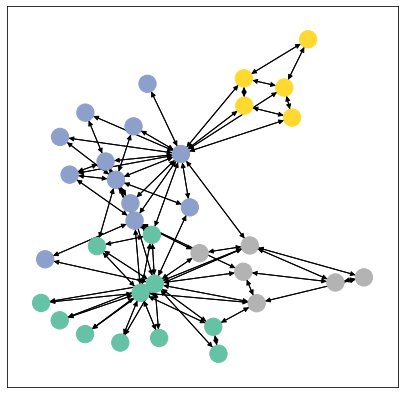

In [30]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=False)
visualize(G, color=data.y)

In [29]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [26]:
visualize(G, color=data.y)

ValueError: 'c' argument has 34 elements, which is inconsistent with 'x' and 'y' with size 2708.